In [2]:
pip install lightgbm

In [3]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer_data =load_breast_cancer()
cancer_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [6]:
import pandas as pd

In [7]:
import pandas as pd
X = cancer_data.data
y = cancer_data.target
cancer_data = pd.DataFrame(X,columns = cancer_data.feature_names)

cancer_data['TARGET'] = y
cancer_data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [9]:
####### Replace categorical values with numbers########
cancer_data['TARGET'].value_counts()

1    357
0    212
Name: TARGET, dtype: int64

In [10]:
X = cancer_data.drop(['TARGET'],axis=1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
y = cancer_data[['TARGET']]
y

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [13]:
##Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
lgbm_params = {'learning_rate':0.05, 
               'boosting_type':'dart',    #Try dart for better accuracy #gbdt
               'objective':'binary',
               'metric':['auc', 'binary_logloss'],
               'num_leaves':100,
               'max_depth':10}

In [30]:
start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 50) #50 iterations. Increase iterations for small learning rates
stop=datetime.now()
execution_time_lgbm = stop-start
print("LGBM execution time is: ", execution_time_lgbm)

LGBM execution time is:  0:00:00.189613


In [31]:
#Prediction on test data
y_pred_lgbm=clf.predict(X_test)
y_pred_lgbm

array([0.90498815, 0.13873902, 0.12587612, 0.91240406, 0.91575657,
       0.13581893, 0.13469091, 0.30932181, 0.60601362, 0.89579044,
       0.88276975, 0.15165972, 0.89881436, 0.575407  , 0.91326252,
       0.13172936, 0.91254069, 0.91217391, 0.91262018, 0.13420232,
       0.86006433, 0.89679125, 0.13180189, 0.91588627, 0.88273681,
       0.86713137, 0.917053  , 0.86643142, 0.915501  , 0.12700631,
       0.90733794, 0.91416867, 0.83487816, 0.90983787, 0.91538674,
       0.90935416, 0.45523684, 0.83027026, 0.12992499, 0.73244467,
       0.91553107, 0.12476009, 0.9225189 , 0.9154202 , 0.80489044,
       0.8950209 , 0.90446943, 0.88496159, 0.8954793 , 0.91404408,
       0.12979935, 0.13182853, 0.8342085 , 0.82288373, 0.916278  ,
       0.89640664, 0.91613157, 0.13153318, 0.19540361, 0.90689331,
       0.91542823, 0.13170531, 0.13216027, 0.84523026, 0.91632601,
       0.8600245 , 0.12894201, 0.13569606, 0.9128334 , 0.90101178,
       0.14422347, 0.13020051, 0.89719812, 0.14589826, 0.88273

In [32]:
#convert into binary values 0/1 for classification
for i in range(0, X_test.shape[0]):
    if y_pred_lgbm[i]>=.5:       # setting threshold to .5
       y_pred_lgbm[i]=1
    else:  
       y_pred_lgbm[i]=0

In [33]:
#Print accuracy
print ("Accuracy with LGBM = ", metrics.accuracy_score(y_pred_lgbm,y_test))

#GBDT - 95.6140
#DART - 96.50

Accuracy with LGBM =  0.9649122807017544


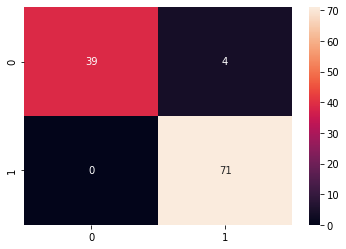

In [34]:
#Confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True)

In [36]:
print("AUC score with LGBM is: ", roc_auc_score(y_pred_lgbm,y_test))
#AUC with GBDT - 96.04
#AUC with DART - 97.33

AUC score with LGBM is:  0.9733333333333334


## **XGBOOST**

In [40]:
import xgboost as xgb 
dtrain=xgb.DMatrix(X_train,label=y_train)


#setting parameters for xgboost
parameters={'max_depth':10, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05,
             'ntree_limit':'num_round'}

In [42]:
start = datetime.now() 
xg=xgb.train(parameters, dtrain, 50,) 
stop = datetime.now()

In [43]:
#Execution time of the model 
execution_time_xgb = stop-start 
print("XGBoost execution time is: ", execution_time_xgb)

XGBoost execution time is:  0:00:00.085592


In [44]:
#now predicting the model on the test set 
dtest=xgb.DMatrix(X_test)
y_pred_xgb = xg.predict(dtest) 
y_pred_xgb

array([0.95560884, 0.04670651, 0.04670651, 0.9537023 , 0.95624447,
       0.04670651, 0.04670651, 0.1603016 , 0.36296606, 0.9305706 ,
       0.90305775, 0.05922021, 0.93202883, 0.35635746, 0.9545101 ,
       0.0576926 , 0.952365  , 0.9525279 , 0.95624447, 0.04670651,
       0.9241578 , 0.95624447, 0.04670651, 0.95624447, 0.94778883,
       0.90283585, 0.95560884, 0.90431106, 0.95624447, 0.04670651,
       0.9522422 , 0.95624447, 0.75554246, 0.95344365, 0.95624447,
       0.95624447, 0.21091998, 0.9526681 , 0.04670651, 0.8953967 ,
       0.95624447, 0.04670651, 0.9537023 , 0.95624447, 0.7994155 ,
       0.9486641 , 0.9512375 , 0.9073691 , 0.95560884, 0.95383966,
       0.04670651, 0.04670651, 0.9148721 , 0.87775636, 0.95624447,
       0.95624447, 0.95624447, 0.04670651, 0.13902105, 0.95624447,
       0.95624447, 0.04670651, 0.04670651, 0.8815996 , 0.95624447,
       0.93171215, 0.04670651, 0.0586894 , 0.95624447, 0.95560884,
       0.05679741, 0.04670651, 0.9545101 , 0.04670651, 0.94778

In [45]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_xgb[i]>=.5:       # setting threshold to .5 
       y_pred_xgb[i]=1 
    else: 
       y_pred_xgb[i]=0  

Accuracy with XGBoost=  0.956140350877193
AUC score with XGBoost is:  0.9553571428571429


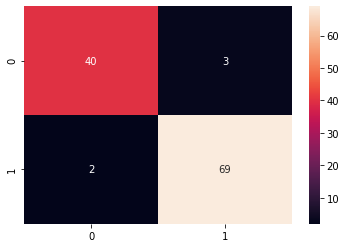

In [46]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with XGBoost= ", metrics.accuracy_score(y_pred_xgb, y_test))
print("AUC score with XGBoost is: ", roc_auc_score(y_pred_xgb, y_test))

#Without 'ntree_limit=num_round' --> Accuracy --> 95.61, AUC --> 95.53
#With 'ntree_limit=num_round'    --> Accuracy --> 95.61, AUC --> 95.53

In [47]:
################
#SUMMARY
print("################################################")
print("LGBM execution time is: ", execution_time_lgbm)
print("XGBoost execution time is: ", execution_time_xgb)
print("################################################")
print ("Accuracy with LGBM = ", metrics.accuracy_score(y_pred_lgbm,y_test))
print ("Accuracy with XGBoost= ", metrics.accuracy_score(y_pred_xgb, y_test))
print("################################################")
print("AUC score with LGBM is: ", roc_auc_score(y_pred_lgbm,y_test))
print("AUC score with XGBoost is: ", roc_auc_score(y_pred_xgb, y_test))

################################################
LGBM execution time is:  0:00:00.189613
XGBoost execution time is:  0:00:00.085592
################################################
Accuracy with LGBM =  0.9649122807017544
Accuracy with XGBoost=  0.956140350877193
################################################
AUC score with LGBM is:  0.9733333333333334
AUC score with XGBoost is:  0.9553571428571429
